In [1]:
import pandas as pd
import seaborn as sns

import pipeline
#import cleaning
from model import *
from extract_data import *
from evaluation import *
from config import *
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
# Read the config file
cfg = pipeline.read_config('config.yaml')

In [ ]:
cfg

## 1. Read Data

In [ ]:
df = pipeline.read_data(cfg['datafile'])

In [ ]:
cleaning.convert_dtypes(df)

In [ ]:
df = cleaning.select_features(df)

In [ ]:
cleaning.generate_time_label(df, 'date_posted', 'datefullyfunded', cfg['outcome_var'])

In [ ]:
df = cleaning.generate_dummy(df, cfg['feature_types']['categorical'])

In [ ]:
df.head()

## Explore Data

In [ ]:
df.dtypes

In [ ]:
pipeline.view_variable_freq(df, 'school_latitude')

In [ ]:
pipeline.view_variable_freq(df, 'secondary_focus_area')

### Missing Data

Next, we will analyze missing data. Specifically, we will look to see if any of the features have any missing data and if so, if there are any patterns.

In [ ]:
nan_vars = pipeline.analyze_missing_data(df)

The heatmap shows the following pairs of features have exactly same missing data patterns:
- __*secondary_focus_subject*__ & __*secondary_focus_area*__
- __*primary_focus_subject*__ & __*primary_focus_area*__


In [ ]:
t = [1,2,3].remove(1)
print(t)

In [3]:
df = read_data('./data/clean_projects_2012_2013.csv')

In [4]:
df = df.drop('datefullyfunded', axis=1)

In [5]:
df = df.reset_index()
df = df.drop('projectid', axis=1)

                  NaN  Percent of NaN
students_reached  59   0.05          

################################################################

The following features have missing values:
['students_reached']

- students_reached has 59 missing values, which are 0.05% of the entire data

################################################################

Nullity matrix and correlation heatmap for features with NaNs.


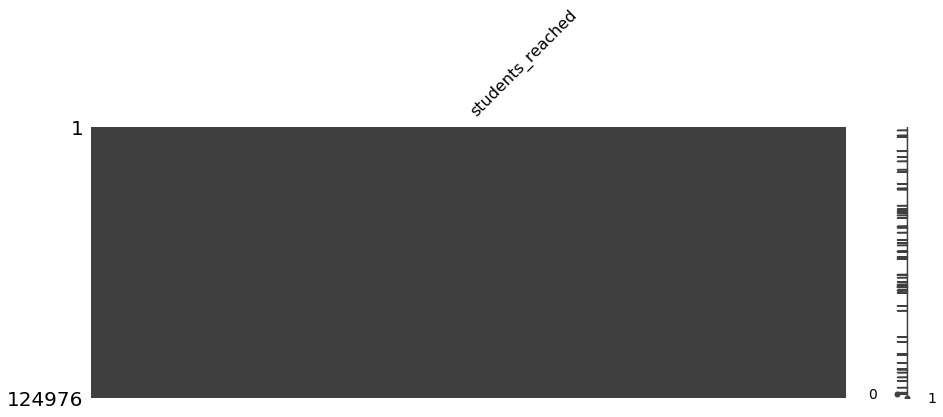

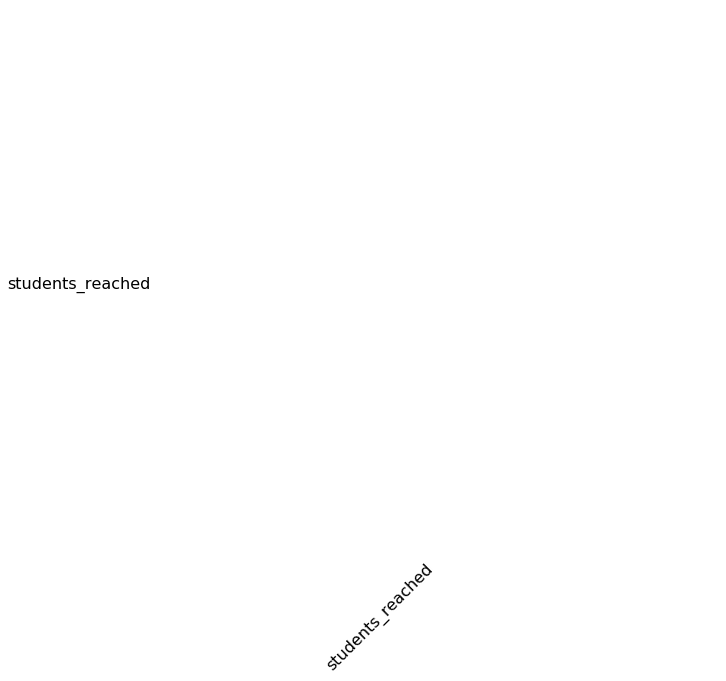

In [6]:
nan_vars = pipeline.analyze_missing_data(df)

In [7]:
pipeline.impute_missing_data(df, nan_vars)

For students_reached, median is selected.

Imputation completed!


In [8]:
temporal_sets = temporal_loop(df, 'date_posted', ['2012-07-01', '2013-01-01', '2013-07-01'], 6)

In [9]:
CONFIG = read_config('./config.yaml')

In [10]:

grid = CONFIG['parameters']
models = CONFIG['models']
outcome = CONFIG['outcome_var']

In [ ]:
for (date, (X_train, X_test, y_train, y_test)) in temporal_sets:

    for m in models:
        mdls = train_model(X_train, y_train, m, grid)
        for params, ms in mdls:
            print(m)
            print(params)
            print(evaluate_model(X_test, y_test, ms))

In [ ]:
full_results = pd.DataFrame(columns=['Date', 'Model','Parameters','Accuracy','F1','AUC_ROC','Precision_at_1%', 'Recall_at_1%','Precision_at_2%', 'Recall_at_2%','Precision_at_5%', 'Recall_at_5%','Precision_at_10%', 'Recall_at_10%','Precision_at_20%', 'Recall_at_20%','Precision_at_30%', 'Recall_at_30%','Precision_at_50%', 'Recall_at_50%'])

i = 0

for (date, (X_train, X_test, y_train, y_test)) in temporal_sets:

    for m in models:
        mdls = train_model(X_train, y_train, m, grid)
        for params, ms in mdls:
            (acc, f1, auc, p1, r1, p2, r2, p5, r5, p10, r10, p20, r20, p30, r30, p50, r50) = evaluate_model(X_test, y_test, ms)
            full_results.loc[i,'Date'] = date
            full_results.loc[i,'Model'] = m
            full_results.loc[i,'Parameters'] = str(params)
            full_results.loc[i,'Accuracy'] = acc
            full_results.loc[i,'F1'] = f1
            full_results.loc[i,'AUC_ROC'] = auc
            full_results.loc[i,'Precision_at_1%'] = p1
            full_results.loc[i,'Recall_at_1%'] = r1
            full_results.loc[i,'Precision_at_2%'] = p2
            full_results.loc[i,'Recall_at_2%'] = r2
            full_results.loc[i,'Precision_at_5%'] = p5
            full_results.loc[i,'Recall_at_5%'] = r5
            full_results.loc[i,'Precision_at_10%'] = p10
            full_results.loc[i,'Recall_at_10%'] = r10
            full_results.loc[i,'Precision_at_20%'] = p20
            full_results.loc[i,'Recall_at_20%'] = r20
            full_results.loc[i,'Precision_at_30%'] = p30
            full_results.loc[i,'Recall_at_30%'] = r30
            full_results.loc[i,'Precision_at_50%'] = p50
            full_results.loc[i,'Recall_at_50%'] = r50
            i += 1


/home/siyoungbyun/anaconda3/envs/donorsml/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/siyoungbyun/anaconda3/envs/donorsml/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
full_results.head(20)